# Calculate NLP statistics over classification results in excel format
Analyse a excel sheet of NLP classification results.

Use yaml config

In [1]:
use_config_file = True
# config_file = './../resources/config/result-analysis/tnm/result-analysis-tn-val.yaml'
config_file = './../resources/config/result-analysis/concept/result-analysis-concept1.yaml'

cfg = None
if use_config_file:
    import yaml
    with open(config_file, 'r') as yaml_file:
        cfg = yaml.safe_load(yaml_file)


Set path of excel sheet

In [2]:
path_excel_sheet = "./../resources/data_ignored/Comparison with ground truth.xlsx"
if use_config_file:
    path_excel_sheet = cfg['path_excel_sheet']


Set output directory

In [3]:
path_output_dir = "./../resources/"

out_file = None
out_file_excel = None
if use_config_file:
    path_output_dir = cfg['path_output_dir']
try:
    from pathlib import Path
    Path(path_output_dir).mkdir(parents=True, exist_ok=True)
    out_file = open(path_output_dir + "/"+ "result-analysis-out.txt", "w")
    out_file_excel = path_output_dir + "/"+ "result-analysis-out.xlsx"
except OSError:
    print ("Creation of the directory %s failed" % path_output_dir)
else:
    print ("Successfully created the directory %s " % path_output_dir)
    

Successfully created the directory ./../resources/results/concept1 


Set label and classification columns

In [4]:
column_actual = 'label longembolie'
column_predicted = 'target-snomedct:59282003'

if use_config_file:
    column_actual = cfg['column_actual']
    column_predicted = cfg['column_predicted']

Read columns and determine values, in case of key error, make sure the columns are set correctly

In [5]:
import pandas
df = pandas.read_excel(path_excel_sheet, header=0)

def replace_by_bool():
    df[column_actual] = df[column_actual].astype(bool)
    df[column_predicted] = df[column_predicted].astype(bool)


def remove_invalid_labels(): 
    df = df[df[column_actual] != "?"] # Filter dataframe on reports that have a valid label
    df = df[df[column_actual] != "?"] # Filter dataframe on reports that have a valid label

    
replace_bool = False # this should be configurable
remove_labels = False
if replace_bool: replace_by_bool()
if remove_labels: remove_invalid_labels()

    
actual_values = df[column_actual].value_counts().index.tolist() 
predicted_values = df[column_predicted].value_counts().index.tolist() 
all_values = list(set(actual_values).union(set(predicted_values)))

print('actual category values={}'.format(actual_values))
print('predicted category values={}'.format(predicted_values))
print('all values={}'.format(all_values))

actual category values=[0, 1]
predicted category values=[0, 1]
all values=[0, 1]


Manually set valid values from actual and predicted categories (other values will be ignored)

In [6]:
valid_values = []
ignored_values = []

if use_config_file and 'valid_values' in cfg:
    valid_values = cfg['valid_values']
if use_config_file and 'ignored_values' in cfg:
    ignored_values = cfg['ignored_values']

if not valid_values or len(valid_values) == 0:
    valid_values = all_values
    
def matches_ignored(value):
    for ignored in ignored_values:
        if ignored == value:
            return True
    return False
    
valid_values = [] 
for value in all_values:
    if not matches_ignored(value):
        valid_values.append(value)

valid_values.sort()

Check valid values

In [7]:
df_valid = df[df[column_actual].isin(valid_values)]

actual_index_valid = df_valid[column_actual].value_counts().index.tolist() 
predicted_index_valid = df_valid[column_predicted].value_counts().index.tolist() 

print('actual category values:', actual_index_valid)
print('predicted category values:', predicted_index_valid)

actual category values: [0, 1]
predicted category values: [0, 1]


Histograms Original

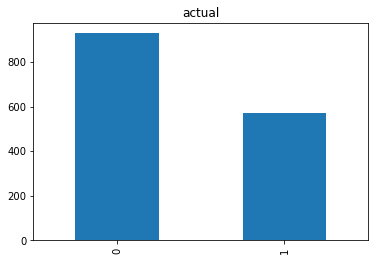

In [8]:
actual_bar_plt = df[column_actual].value_counts(sort = False).plot(kind='bar', title='actual')

Histograms Valid Values only

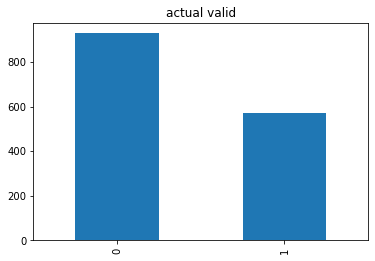

In [9]:
actual_valid_bar_plot = df_valid[column_actual].value_counts().plot(kind='bar', title='actual valid')

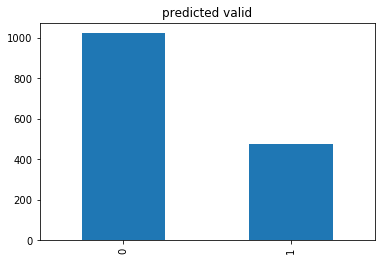

In [10]:
predicted_valid_bar_plt = df_valid[column_predicted].value_counts().plot(kind='bar', title='predicted valid')

Metrics

In [11]:
df = df_valid

from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
y_actu = pandas.Series(df[column_actual], name='Actual')
y_pred = pandas.Series(df[column_predicted], name='Predicted')

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

accuracy = "accuracy = " + str(round(accuracy_score(y_actu, y_pred), 4))
print(accuracy)
out_file.write(accuracy + "\n\n")

avg = ["micro", "macro", "weighted"]
for avg_opt in avg:
    a_precision = avg_opt + "_precision = " + str(round(precision_score(y_actu, y_pred, average=avg_opt), 4))
    a_recall_score = avg_opt + "_recall_score = " + str(round(recall_score(y_actu, y_pred, average=avg_opt), 4))
    a_f1 = avg_opt + "_f1 = " + str(round(f1_score(y_actu, y_pred, average=avg_opt), 4))
    print(a_precision)
    print(a_recall_score)
    print(a_f1)       
    out_file.write(a_precision + "\n")
    out_file.write(a_recall_score + "\n")
    out_file.write(a_f1 + "\n")
    out_file.write("\n")
    
from sklearn.metrics import precision_recall_fscore_support as score
predicted = [1,2,3,4,5,1,2,1,1,4,5] 

precision, recall, fscore, support = score(y_actu, y_pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

out_file.write('precision: {}'.format(precision) + '\n')
out_file.write('recall: {}'.format(recall) +'\n')
out_file.write('fscore: {}'.format(fscore) + '\n')
out_file.write('support: {}'.format(support) + '\n')
print('\n')
               
prf = precision_recall_fscore_support(y_actu, y_pred, average=None, labels=valid_values)
evaldf = pandas.DataFrame({"Precision": prf[0], "Recall": prf[1], "F-score": prf[2]}, index=valid_values)
print(evaldf)
out_file.write(str(evaldf) + "\n\n")

accuracy = 0.9373
micro_precision = 0.9373
micro_recall_score = 0.9373
micro_f1 = 0.9373
macro_precision = 0.9541
macro_recall_score = 0.9177
macro_f1 = 0.9311
weighted_precision = 0.9431
weighted_recall_score = 0.9373
weighted_f1 = 0.936
precision: [0.90811339 1.        ]
recall: [1.         0.83537653]
fscore: [0.95184426 0.91030534]
support: [929 571]


   Precision    Recall   F-score
0   0.908113  1.000000  0.951844
1   1.000000  0.835377  0.910305


100

Create confusion matrix

In [12]:
crosstab = pandas.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print("CONFUSION MATRIX")
print(crosstab)
out_file.write(str(crosstab))


import openpyxl
crosstab.to_excel(out_file_excel)


CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0           929    0   929
1            94  477   571
All        1023  477  1500


Plot confusion matrix

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

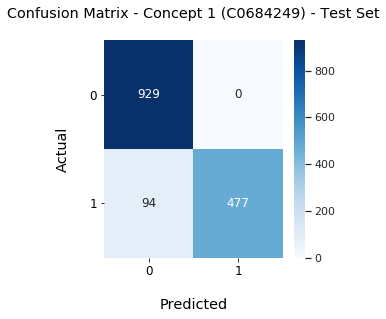

In [13]:
import seaborn
import matplotlib
import matplotlib.pyplot as plt

data = {'y_Actual': df_valid[column_actual], 'y_Predicted': df_valid[column_predicted]}
df = pandas.DataFrame(data, columns=['y_Actual','y_Predicted'])

confusion_matrix = pandas.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

plt.figure(figsize=(cfg['confusion_matrix']['fig_size']['x'],cfg['confusion_matrix']['fig_size']['y']))  
plt.title(cfg['confusion_matrix']['title'] + '\n')

seaborn.set(font_scale=1)

confusion_matrix_heatmap = seaborn.heatmap(confusion_matrix, annot=True, cmap=matplotlib.cm.Blues, fmt='d' )
confusion_matrix_heatmap.set_xticklabels(confusion_matrix_heatmap.get_xmajorticklabels(), fontsize=cfg['confusion_matrix']['font_size'])

confusion_matrix_heatmap.axes.set_title(confusion_matrix_heatmap.get_title(),fontsize=cfg['confusion_matrix']['font_size'])
confusion_matrix_heatmap.set_xlabel(confusion_matrix_heatmap.get_xlabel(),fontsize=cfg['confusion_matrix']['font_size'], labelpad=20)
confusion_matrix_heatmap.set_ylabel(confusion_matrix_heatmap.get_ylabel(),fontsize=cfg['confusion_matrix']['font_size'], labelpad=20)
confusion_matrix_heatmap.tick_params(labelsize=cfg['confusion_matrix']['tick_label_font_size'])
confusion_matrix_heatmap.set_yticklabels(confusion_matrix_heatmap.get_ymajorticklabels(),  rotation = 0)






Save confusion matix figure to file

In [14]:
fig = confusion_matrix_heatmap.get_figure()
fig.savefig(path_output_dir + '/' + cfg['confusion_matrix']['title'].lower().replace(' ','_') + '.eps', bbox_inches='tight', dict="eps", dpi=600)
fig.savefig(path_output_dir + '/' + cfg['confusion_matrix']['title'].lower().replace(' ','_') + '.png', bbox_inches='tight', dpi=200)

out_file.close()